In [1]:
##Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
##Filter warnings
import warnings
warnings.filterwarnings('ignore')

### Previous Code

The following code is from Session 2. Since this exercise is a continuation of the same problem statement, we have provided the code for building the k-NN model. Simply run the cells present below and then start attempting the questions from the `Session 3 - Model Selection` section.

In [3]:
##Load the dataset and check the top 5 rows
fraud_df = pd.read_csv("fraud_detection_data_final.csv")

In [4]:
## Write your code here
non_categorical_columns = ['amt','trans_hour']
for column in fraud_df.columns:
    if column not in non_categorical_columns:
        fraud_df[column] = pd.Categorical(fraud_df[column])

In [5]:
y = fraud_df['is_fraud']
X = fraud_df.iloc[:, :-1]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 100)

In [7]:
scaler = StandardScaler()

In [8]:
##Scale the numerical data

X_train[['amt','trans_hour']]= scaler.fit_transform(X_train[['amt','trans_hour']])
X_val[['amt','trans_hour']]= scaler.transform(X_val[['amt','trans_hour']])

In [ ]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,35)} # Parameter range

# defining parameter range
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 34 candidates, totalling 170 fits


In [10]:
knn_clf_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_clf_best.fit(X_train, y_train)
y_pred = knn_clf_best.predict(X_val)

In [11]:
knn_acc = accuracy_score(y_val, y_pred)

In [12]:
print('Validation data Accuracy Score: %.4f' % knn_acc)

Validation data Accuracy Score: 0.8675


### Session 3 - Model Selection







#### Segment: Classification Model Selection

In [13]:
##Import Additional Libraries
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

#### Q1 Tree Model Validation Accuracy
What is the validation set accuracy obtained from fitting a classification tree model on the training data? (Use ccp_alpha as 0.004 and the random state as 0)

In [14]:
#Write your code to build the Tree Model Here
tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.004)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, random_state=0)

In [15]:
#Calculate the validation accuracy
tree_train_acc = tree_clf.score(X_train, y_train)
tree_val_acc = tree_clf.score(X_val, y_val)

In [16]:
tree_train_acc

0.9401812688821752

In [17]:
tree_val_acc

0.9337561663143058

In [18]:
tree_clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=0.004)
tree_clf_best.fit(X_train,y_train)

tree_val_acc = tree_clf_best.score(X_val, y_val)

In [19]:
round(tree_val_acc, 2)

0.93

#### Q2 Compare the Accuracies

Now that you have built 2 models on the Credit Dataset (the k-NN model in the previous session and the classification tree model in the previous question), go head and build the final classification model - a logistic regression model and compute the validation accuracy. Take random state = 0, solver = lbfgs and keep the model unregularized

After that Choose the correct sequence of the validation accuracies for the models.

In [20]:
## Write the code to build the logistic Regression Model
log_clf_best = LogisticRegression(random_state=0, solver='lbfgs')
log_clf_best.fit(X_train, y_train)
y_pred = log_clf_best.predict(X_val)

In [21]:
## Calculate its validation accuracy
log_reg_acc = log_clf_best.score(X_val, y_val)

In [22]:
accuracy_score(y_val, y_pred)

0.8202959830866807

In [23]:
pd.DataFrame([[log_clf_best],[tree_val_acc], 
              [knn_acc]], columns=['Validation accuracy'], 
              index = ['Linear', 'Tree', 'kNN'])

,Validation accuracy
Linear,LogisticRegression(random_state=0)
Tree,0.933756
kNN,0.867512


The next question is from a future segment. Attempt it only after reaching that segment on the platform.

### Segment: Selecting the Best Credit Model IV

#### Misclassification Cost

We will continue with the Credit Card Fraud Detection dataset. We will now look at the model performances in terms of their business impact. In this case, there are certain business criteria that we have to consider to base our model selection on.


If our model is able to predict the fraudulent transactions accurately, it will potentially save the bank the entire transaction amount. Therefore, the average transaction amount for all the fraudulent transactions will be the false negative cost.


If our model is predicting non-fraudulent transactions as fraudulent, the bank has to spend additional cost for verifying the transaction. Let's say this amount comes out to be $150. This value will be the false positive cost.


We want to minimize the misclassification cost by minimizing the number of fraudulent transactions. In the following guided assessment, you'll be calculating the misclassification cost for all the three models and then identifying the model that gives the least misclassification cost.

In [24]:
## Calculate the false negative cost
## This is the average of the 'amt' column for all the fraudulent transactions
fn_cost = np.mean(fraud_df[fraud_df['is_fraud']==1]['amt'])

In [25]:
##Take the value of false positive cost
fp_cost = 150

##### Calculating the misclassification cost for all three models

##Q - Run the following code and identify the model with the least misclassification cost

Note - In the first line of the code, we have taken the names of the 3 models as `log_clf_best`, `tree_clf_best` and `knn_clf_best` for the best performing logistic regression, tree model and knn model respectively. In case you have chosen a different name for any of the models, change the name in the below code accordingly.

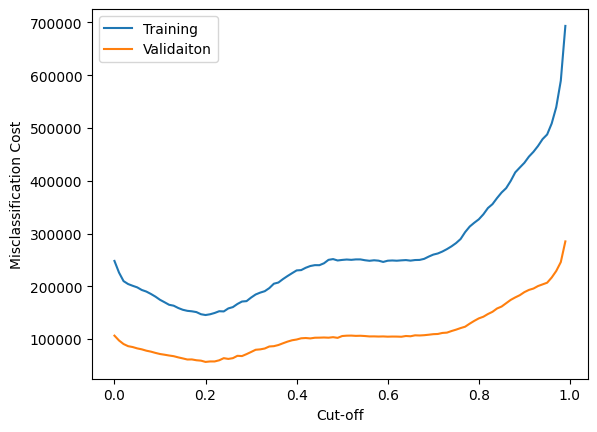

Best Misclassification Cost for LogisticRegression(random_state=0) on the training is 145578.05931501056 at Cut-off 0.2
Applying that cut-off to the validation data results in Misclassification Cost of 56701.10 


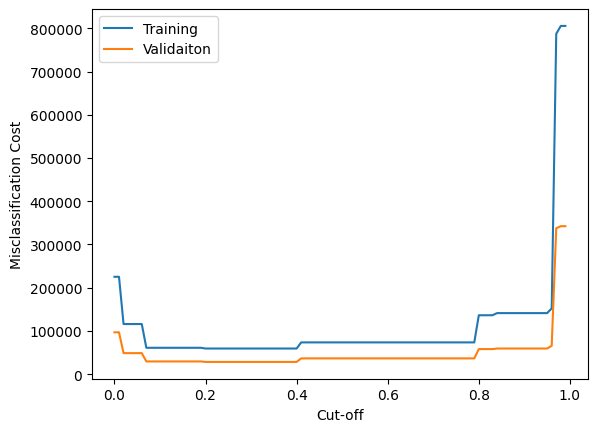

Best Misclassification Cost for DecisionTreeClassifier(ccp_alpha=0.004, random_state=0) on the training is 59405.4910782241 at Cut-off 0.2
Applying that cut-off to the validation data results in Misclassification Cost of 28427.75 


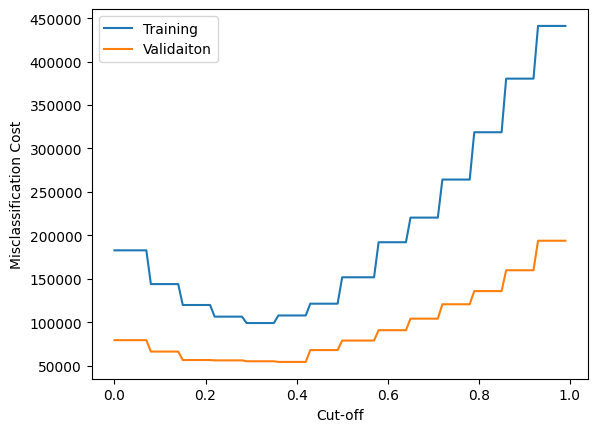

Best Misclassification Cost for KNeighborsClassifier(n_neighbors=14) on the training is 99006.43240591965 at Cut-off 0.29
Applying that cut-off to the validation data results in Misclassification Cost of 54979.16 


In [26]:
for clf_model in [log_clf_best, tree_clf_best, knn_clf_best]:
    cost_train = []
    cost_val=[]
    probs_train = clf_model.predict_proba(X_train)[:, 1]
    probs_val = clf_model.predict_proba(X_val)[:, 1]
    ##Code for misclassification cost
    for cutoff in np.arange(0, 1, 0.01):
        curr_preds = np.where(probs_train > cutoff, 1, 0)
        curr_cf = confusion_matrix(y_train, curr_preds)
        curr_fp_count = curr_cf[0,1]
        curr_fn_count = curr_cf[1,0]
        curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
        cost_train.append(curr_misclassification_cost)
        curr_preds = np.where(probs_val > cutoff, 1, 0)
        curr_cf = confusion_matrix(y_val, curr_preds)
        curr_fp_count = curr_cf[0,1]
        curr_fn_count = curr_cf[1,0]
        curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
        cost_val.append(curr_misclassification_cost)

    # Get the X values (cut-off values)
    cutoffs = np.arange(0, 1, 0.01)

    # Plot misclassification cost against cut-off value
    plt.plot(cutoffs,cost_train, label='Training')
    plt.plot(cutoffs,cost_val, label='Validaiton')
    plt.xlabel('Cut-off')
    plt.ylabel('Misclassification Cost')
    plt.legend()
    plt.show()

    # Find the minimum misclassification cost and its associated cut-off value based on the training data
    best_cost = min(cost_train)
    best_cutoff = cutoffs[cost_train.index(best_cost)]

    #apply the cut-off value to the validation data
    best_valcost=cost_val[cost_train.index(best_cost)]


    print('Best Misclassification Cost for {model} on the training is {best_cost} at Cut-off {best_cutoff}'.format(model = clf_model,best_cost = best_cost, best_cutoff=best_cutoff));
    print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);